# Подготовка

In [52]:
# Импортируем нужные библиотеки
import pandas as pd 
import requests 
from urllib.parse import urlencode 
import seaborn as sns

In [4]:
# Объявим нужные функции

#Функция для получения датафрейма по ссылке на яндекс диск
def get_df_rom_ya_disk(public_key):
    # Используем api 
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
 
    # Получаем url 
    final_url = base_url + urlencode(dict(public_key=public_key)) 
    response = requests.get(final_url) 
    download_url = response.json()['href'] 
 
    # Загружаем файл в df 
    download_response = requests.get(download_url) 
    return pd.read_csv(download_url, sep=',') 

In [69]:
# Считываем все файлы
assessments = get_df_rom_ya_disk('https://disk.yandex.ru/d/iSVP1sZ7AdW7TQ')
courses = get_df_rom_ya_disk('https://disk.yandex.ru/d/jmJxR8yhwCXlaw')
studentAssessment = get_df_rom_ya_disk('https://disk.yandex.ru/d/DYd4M5b_8RETsA')
studentRegistration = get_df_rom_ya_disk('https://disk.yandex.ru/d/lqHnH8NOZ458iw')

# Изучим данные

## assessments
### Анализ

In [117]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', assessments.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', assessments.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', assessments.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', assessments.isna().sum(), '\n')

Размер таблицы: (206, 6) 

Первые 5 строк:
   code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0 

Типы переменных:
 code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object 

Наличие пропусков:
 code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64 



Курсы и формы контроля:
 FFF    52
BBB    42
DDD    35
GGG    30
CCC    20
EEE    15
AAA    12
Name: code_module, dtype: int64 

Семестры и формы контроля:
 2014B    57
2014J    57
2013J    53
2013B    39
Name: code_presentation, dtype: int64 

Количество форм контроля: 206 

Виды контроля:
 TMA     106
CMA      76
Exam     24
Name: assessment_type, dtype: int64 

Основные статистики по дедлайнам:
 count    195.000000
mean     145.005128
std       76.001119
min       12.000000
25%       71.000000
50%      152.000000
75%      222.000000
max      261.000000
Name: date, dtype: float64 

Курсы без дедлайна:
     code_module code_presentation  id_assessment assessment_type  date  weight
5           AAA             2013J           1757            Exam   NaN   100.0
11          AAA             2014J           1763            Exam   NaN   100.0
23          BBB             2013B          14990            Exam   NaN   100.0
35          BBB             2013J          15002            Exam   NaN  

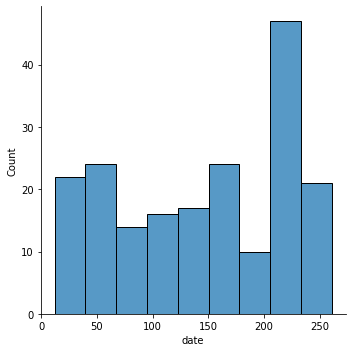

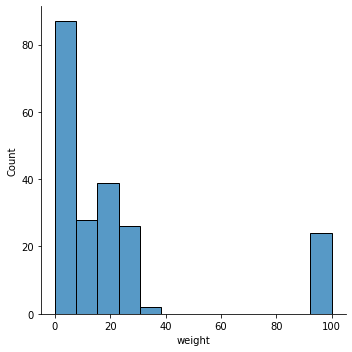

In [121]:
# Изучим подробнее все переменные

#code_module
#Уникальные значения
print('Курсы и формы контроля:\n', assessments.code_module.value_counts(), '\n')

#code_presentation
#Уникальные значения
print('Семестры и формы контроля:\n', assessments.code_presentation.value_counts(), '\n')
      
#id_assessment
#Количество различных индексов
print('Количество форм контроля:', len(assessments.id_assessment.unique().tolist()), '\n')

#assessment_type
#Уникальные значения
print('Виды контроля:\n', assessments.assessment_type.value_counts(), '\n')

#date         
#Посмотрим основные статистики
print('Основные статистики по дедлайнам:\n', assessments.date.describe(), '\n')
sns.displot(data = assessments, x = 'date')
# Посмотрим, что за пропуски
as_nodate = assessments.query('date.isnull()')
print('Курсы без дедлайна:\n', as_nodate, '\n')

#weight
#Посмотрим основные статистики
print(':\n', assessments.weight.describe())
sns.displot(data = assessments, x = 'weight')

### Интересное
- 7 предметов
- 4 семестра
- 206 форм контроля
- 3 вида контроля
- 11 пропусков в колонке date - всё соответствует экзаменам, возможно они не состоялись
- выше есть картинки распределений весов и дат

## courses
### Анализ

In [116]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', courses.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', courses.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', courses.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', courses.isna().sum(), '\n')

Размер таблицы: (22, 3) 

Первые 5 строк:
   code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240 

Типы переменных:
 code_module                   object
code_presentation             object
module_presentation_length     int64
dtype: object 

Наличие пропусков:
 code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64 



Курсы и семестры, где они есть:
 DDD    4
FFF    4
BBB    4
EEE    3
GGG    3
CCC    2
AAA    2
Name: code_module, dtype: int64 

Семестры и курсы в них:
 2014J    7
2013J    6
2014B    6
2013B    3
Name: code_presentation, dtype: int64 

Основные статистики по длительности курса/семестра:
 count     22.000000
mean     255.545455
std       13.654677
min      234.000000
25%      241.000000
50%      261.500000
75%      268.000000
max      269.000000
Name: module_presentation_length, dtype: float64


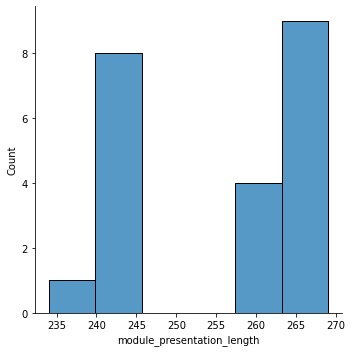

In [122]:
# Изучим подробнее все переменные

#code_module
#Уникальные значения
print('Курсы и семестры, где они есть:\n', courses.code_module.value_counts(), '\n')

#code_presentation
#Уникальные значения
print('Семестры и курсы в них:\n', courses.code_presentation.value_counts(), '\n')

#module_presentation_length
#Посмотрим основные статистики
print('Основные статистики по длительности курса/семестра:\n', courses.module_presentation_length.describe())
sns.displot(data = courses, x = 'module_presentation_length')

### Интересное
- Количество предметов и семестров совпадает с предыдущей таблицей (это хорошо)
- У каждого предмета было от 2 до 4 запусков
- В каждом семестре было от 3 до 7 предметов
- Сумма дней в семестрах одного года больше 365 - видимо, это не классические вузовские семестры, а скорее какие-то потоки набора, какая-то часть двух семестров идёт параллельно

## studentAssessment
### Анализ

In [115]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', studentAssessment.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', studentAssessment.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', studentAssessment.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', studentAssessment.isna().sum(), '\n')

Размер таблицы: (173912, 5) 

Первые 5 строк:
    id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0 

Типы переменных:
 id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object 

Наличие пропусков:
 id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64 



In [113]:
# Изучим подробнее все переменные

#id_assessment
#Количество различных форм контроля
print('#Количество различных форм контроля', len(studentAssessment.id_assessment.unique().tolist()), '\n')
# Хммм, элементов оценивания меньше... Давайте посмотрим каких элементов из общего пула нет
# Но сначала глянем, вдруг есть элементы оценивания, которых нет в общем пуле
print('Элементы оценивания, которых нет в пуле:\n', 
                              studentAssessment.query('id_assessment not in @assessments.id_assessment'), '\n')
# Таких нет, хорошо
# Давайте посмотрим каких элементов из общего пула нет
abs_as = assessments.query('id_assessment not in @studentAssessment.id_assessment').id_assessment
print('Курсы, которые никто не взял:\n', abs_as, '\n')
# Хм. Интересно. Здесь почти все тесты без даты + ещё несколько
# Давайте сравним
no_date_but_taken = as_nodate.query('id_assessment not in @abs_as')
print('Нет дедлайна, но сдали:\n',no_date_but_taken, '\n')
# Таких элемента 3... Давайте посмотрим, какая вообще инфа по ним есть в этой таблице
print("Результаты элементов контроля по которым не стояли дедлайны:\n",
    studentAssessment\
    .query('id_assessment in @no_date_but_taken.id_assessment')\
    .groupby('id_assessment', as_index = True)\
    .score.describe(), '\n'
)
# Ну, их сдавали. Возможно просто не было в таблице в с формами контроля дедлайна этого экзамена, поэтому там NA, 
# но при этом их сдавали
# Что до элементов, у которых есть дедлайн в таблице со всеми формами контроля, а тут нет. Видимо их не сдал никто
# Возможно курс был отменён
# Что до элементов, у которых нет дедлайна и нет в этой таблице - их скорее всего никто не сдавал

# Сравнить в нулевом вопросе инфу об экзаменах из всех таблиц!!!

#id_student
# Сколько уникальных студентов
print("Сколько уникальных студентов:",len(studentAssessment.id_student.unique().tolist()))

#date_submitted

#is_banked

#score


#Количество различных форм контроля 188 

Элементы оценивания, которых нет в пуле:
 Empty DataFrame
Columns: [id_assessment, id_student, date_submitted, is_banked, score]
Index: [] 

Курсы, которые никто не взял:
 5       1757
11      1763
23     14990
35     15002
47     15014
53     15025
63     40087
73     40088
113    30713
118    30718
123    30723
136    34872
149    34885
162    34898
175    34911
185    37424
195    37434
205    37444
Name: id_assessment, dtype: int64 

Нет дедлайна, но сдали:
     code_module code_presentation  id_assessment assessment_type  date  weight
62          CCC             2014B          24290            Exam   NaN   100.0
72          CCC             2014J          24299            Exam   NaN   100.0
108         DDD             2014J          25368            Exam   NaN   100.0 

Результаты элементов контроля по которым не стояли дедлайны:
                 count       mean        std   min   25%   50%   75%    max
id_assessment                       

### Интересное
- Количество элементов оценивания меньше чем в таблице assessments на (18)
- Но все элементы оценивания есть в таблице assessments
- 

## studentRegistration
### Анализ

In [123]:
# Общее
# Посмотрим размеры таблицы
print('Размер таблицы:', studentRegistration.shape, '\n')
# Посмотрим верх таблицы
print('Первые 5 строк:\n', studentRegistration.head(5), '\n')
# Посмотрим типы
print('Типы переменных:\n', studentRegistration.dtypes, '\n')
# Посмотрим пропуски
print('Наличие пропусков:\n', studentRegistration.isna().sum(), '\n')

Размер таблицы: (32593, 5) 

Первые 5 строк:
   code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN   

Типы переменных:
 code_module             object
code_presentation       object
id_student               int64
date_registration      float64
date_unregistration    float64
dtype: object 

Наличие пропусков:
 code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64 



In [ ]:
# Изучим подробнее все переменные

#code_module

#code_presentation

#id_student

#date_registration

#date_unregistration


### Интересное
- 